**This is the first draft of my project!**

DATASETS: "Top Spotify songs from 2010-2019 - BY YEAR" and "Spotify - All Time Top 2000s Mega Dataset"

URLS: https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year?resource=download and https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset?select=Spotify-2000.csv

TASK: Improving Song Genre Classification with Text Classification.

STEP 1: Build baseline with song audio features

STEP 2: Build baseline with song lyrics

STEP 3: Combine models

STEP 4: Finetune and improve scores of 1 to 3.

Hypothesis: Lyrics does contain important information not shown in the audio itself that can improve audio classifiers.
(This is most likely already shown in some research but the process of this project seemed very intriguing to me and does contain many steps of problem solving!
)

In [1]:
import pandas as pd
import numpy as np

Data Preaparation

In [2]:
df_B42000 = pd.read_csv("./DATASETS/Spotify-2000.csv")
df_10_to_19 = pd.read_csv("./DATASETS/top10s.csv")
df_B42000['Length (Duration)'] = df_B42000['Length (Duration)'].apply(lambda x: int(x.replace(',',''))) #numbers over 1000 in this column got handled as strings.
df_B42000['Length (Duration)'] = df_B42000['Length (Duration)'].astype(float) #numvers got handled as ints so the describe function did not work for this column.


In [3]:
df_B42000.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


In [4]:
df_10_to_19.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


Since the two datasets both are Kaggle datasets from Spotify, they use the same metrics and the values in the columns seem to follow similiar distributions it does not seem to be any problems to concatenate the datasets to one. 

In [5]:
df_10_to_19.columns = df_B42000.columns #syncing column names
df = df_10_to_19.append(df_B42000, ignore_index=True)
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217.0,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263.0,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200.0,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295.0,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221.0,2,4,78


Since the task is to classify the Genre of the song we can remove some columns. We keep the Title, Artist for future use, but we can remove the columns Year and Popularity since they are not audio features. The Speechiness column is a gray zone but you could consider words per minute as an audio feature so we keep it as an input for now.  

In [6]:
df_complete = df.drop(df.columns[[0,4,14]], axis=1)
df_complete.head()

,Title,Artist,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
0,"Hey, Soul Sister",Train,neo mellow,97,89,67,-4,8,80,217.0,19,4
1,Love The Way You Lie,Eminem,detroit hip hop,87,93,75,-5,52,64,263.0,24,23
2,TiK ToK,Kesha,dance pop,120,84,76,-3,29,71,200.0,10,14
3,Bad Romance,Lady Gaga,dance pop,119,92,70,-4,8,71,295.0,0,4
4,Just the Way You Are,Bruno Mars,pop,109,84,64,-5,9,43,221.0,2,4


We may need to reduce some genres since popular songs does most likely not have uniformly distributed genres. We make the asumption that every label that ends with pop or rock for example is a subgenre of the latest term in the genre label. Therefore all small classes of genres will be classed as their supposed broader class. (We may have to go back if our classifier does not seem to work as intended.)

In [7]:
df_complete['Top Genre'].value_counts()

album rock                 413
dance pop                  410
adult standards            123
pop                        107
dutch pop                   88
                          ... 
uk pop                       1
indie anthem-folk            1
alternative pop              1
alternative r&b              1
german alternative rock      1
Name: Top Genre, Length: 167, dtype: int64

In [8]:
few_genres = df_complete['Top Genre'].unique()
df_few_genres = df_complete 
genre_list = []
for genre in few_genres:
    lst = genre.split()
    mask = df_complete['Top Genre'] == genre
    if lst[-1] == 'hop':
        genre_list.append(lst[-2] +' '+ lst[-1])
        df_few_genres.loc[mask, 'Top Genre'] = lst[-2] +' '+ lst[-1]
    else:
        genre_list.append(lst[-1])
        df_few_genres.loc[mask, 'Top Genre'] = lst[-1]

print(genre_list)
df_few_genres['Top Genre'].value_counts()

['mellow', 'hip hop', 'pop', 'pop', 'pop', 'pop', 'pop', 'hip hop', 'pop', 'pop', 'pop', 'pop', 'room', 'soul', 'rap', 'pop', 'wave', 'band', 'pop', 'rock', 'electro', 'complextro', 'hip hop', 'pop', 'indie', 'folk-pop', 'metropopolis', 'house', 'hip hop', 'electropop', 'dance', 'hollywood', 'r&b', 'singer-songwriter', 'house', 'edm', 'pop', 'hip hop', 'pop', 'latin', 'latin', 'trap', 'edm', 'house', 'downtempo', 'brostep', 'country', 'pop', 'room', 'r&b', 'standards', 'rock', 'hip hop', 'metal', 'rock', 'rock', 'rock', 'rock', 'indie', 'rock', 'cabaret', 'pop', 'rock', 'pop', 'americana', 'dance', 'pop', 'afropop', 'rock', 'disco', 'rock', 'rock', 'britpop', 'limburg', 'country', 'alternative', 'folk', 'celtic', 'chanson', 'hip hop', 'rock', 'rock', 'rock', 'fusion', 'invasion', 'metal', 'pop', 'hip hop', 'metal', 'rock', 'jazz', 'prog', 'pop', 'trance', 'singer-songwriter', 'gold', 'pop', 'rock', 'eurodance', 'blues', 'folk', 'beat', 'pop', 'metal', 'pop', 'funk', 'hardcore', 'pop', 

rock           857
pop            802
standards      123
metal           93
indie           78
              ... 
soundtrack       1
anthem-folk      1
hardcore         1
ccm              1
basshall         1
Name: Top Genre, Length: 73, dtype: int64

In [9]:
unique_genres = df_few_genres['Top Genre']
checklist = [] 
THRESHHOLD = 30

#check genres with fewer datapoints than THRESHHOLD
for genre in unique_genres:
    if df_few_genres['Top Genre'].value_counts()[genre] < THRESHHOLD:
        checklist += [genre]
print(len(checklist), checklist)

416 ['mellow', 'room', 'rap', 'band', 'band', 'room', 'band', 'room', 'electro', 'complextro', 'band', 'band', 'electro', 'band', 'band', 'band', 'mellow', 'room', 'folk-pop', 'metropopolis', 'house', 'band', 'electropop', 'complextro', 'mellow', 'mellow', 'dance', 'mellow', 'mellow', 'mellow', 'hollywood', 'r&b', 'singer-songwriter', 'r&b', 'house', 'band', 'dance', 'house', 'complextro', 'r&b', 'room', 'edm', 'dance', 'room', 'band', 'band', 'r&b', 'electropop', 'room', 'r&b', 'electropop', 'electropop', 'electropop', 'house', 'r&b', 'dance', 'mellow', 'complextro', 'mellow', 'folk-pop', 'latin', 'latin', 'electropop', 'r&b', 'trap', 'r&b', 'complextro', 'edm', 'electropop', 'latin', 'dance', 'room', 'electropop', 'band', 'edm', 'r&b', 'house', 'complextro', 'edm', 'downtempo', 'room', 'dance', 'edm', 'brostep', 'electropop', 'country', 'edm', 'latin', 'downtempo', 'electropop', 'brostep', 'room', 'room', 'edm', 'band', 'band', 'r&b', 'electropop', 'room', 'electropop', 'trap', 'lati

In [10]:
print(len(df_few_genres))
df_few_genres = df_few_genres[~df_few_genres['Top Genre'].isin(checklist)]
print(len(df_few_genres))
df_few_genres['Top Genre'].value_counts()

2597
2181


rock         857
pop          802
standards    123
metal         93
indie         78
soul          56
cabaret       51
hip hop       43
wave          42
invasion      36
Name: Top Genre, dtype: int64

In [11]:
df_few_genres.head()

,Title,Artist,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
1,Love The Way You Lie,Eminem,hip hop,87,93,75,-5,52,64,263.0,24,23
2,TiK ToK,Kesha,pop,120,84,76,-3,29,71,200.0,10,14
3,Bad Romance,Lady Gaga,pop,119,92,70,-4,8,71,295.0,0,4
4,Just the Way You Are,Bruno Mars,pop,109,84,64,-5,9,43,221.0,2,4
5,Baby,Justin Bieber,pop,65,86,73,-5,11,54,214.0,4,14


Finally we have a dataset with a managable amount of target labels. We can still observe that the dataset is highly unbalanced and may have to do something about it later on.

**Building a baseline for audio features**


In [12]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load the data
df = df_few_genres

# Split the data into features and labels
X = df.drop(df.columns[[0,1,2]], axis=1)
y = df['Top Genre']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = MLPClassifier(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the classification report for this fold
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

     cabaret       0.00      0.00      0.00         7
     hip hop       0.29      0.18      0.22        11
       indie       0.00      0.00      0.00        16
    invasion       0.00      0.00      0.00         6
       metal       0.62      0.25      0.36        20
         pop       0.68      0.70      0.69       170
        rock       0.59      0.73      0.65       163
        soul       0.75      0.25      0.38        12
   standards       0.23      0.20      0.21        25
        wave       0.00      0.00      0.00         7

    accuracy                           0.58       437
   macro avg       0.32      0.23      0.25       437
weighted avg       0.55      0.58      0.56       437



/home/hanbiru/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
# some models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.dummy import DummyClassifier

models = { 'Dummy': DummyClassifier(),
                    'Naive Bayes': GaussianNB(),
                    'SGD': OneVsOneClassifier(SGDClassifier()),
                    'Logistic Regression': LogisticRegression(multi_class = 'ovr')#,
                    #'SVC': SVC(random_state=42)#,
                    #'MLP': MLPClassifier(random_state=42),
                    }
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [14]:
results =[]
for name in models:
    model = models[name]
    cv_score = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_score)
    print('%s: %f (%f)' % (name,cv_score.mean(), cv_score.std()))

Dummy: 0.397937 (0.001336)
Naive Bayes: 0.450700 (0.024695)
SGD: 0.535538 (0.026354)
Logistic Regression: 0.581991 (0.016845)


The results above seem to be okay but we can clearly see that the scores for the smaller classes are horrific. We could continue with this dataset or mine some more data for the smaller classes, but I choose to look for more datasets and found a new one with much more data points that are quite balanced between the classes.
DATASET: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

In [15]:
df_Spotify_Features = pd.read_csv("./DATASETS/SpotifyFeatures.csv")
df_Spotify_Features.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [16]:
df_Spotify_Features.genre.value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

We can see that some of the classes are not of our interest so we remove the classes  "Soundtrack" and "Movie" since they may include a lot of different genres and the lyrics are most likely random. "A Capella" is very interersting as a class, but does not include a lot of data points so we abbriviate this class for now. "Anime" and "World" are classes in grayzones that may include various music genres so we keep them for now, but keep an extra eye of their scores! Lastly we have two "Children's Music" so we have to explore them further. 

In [17]:
len(df_Spotify_Features.genre.unique())

27

In [18]:
df_Spotify_Features_Children = df_Spotify_Features[df_Spotify_Features.genre.isin(['Children’s Music', "Children's Music"])]
df_Spotify_Features_Children['track_id'].describe()

count                      14756
unique                     14756
top       4DveRhd1VBtZyPodE3sbLj
freq                           1
Name: track_id, dtype: object

For some reason we have too many Children's Music items and since there are none duplicates we remove around 5000 datapoints to even out the dataset. 

In [19]:
df_Spotify_Features = df_Spotify_Features[~df_Spotify_Features['genre'].isin( ['Children\'s Music', 'A Capella', 'Soundtrack', 'Movie'])]
df_Spotify_Features.genre.value_counts()

Comedy              9681
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Name: genre, dtype: int64

Now we need to explore some of the columns!

In [20]:
df_Spotify_Features.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [21]:
df_Spotify_Features[['key', 'mode', 'time_signature']].value_counts()

key  mode   time_signature
C    Major  4/4               16840
G    Major  4/4               15702
D    Major  4/4               14425
C#   Major  4/4               13369
A    Major  4/4               11276
                              ...  
C#   Major  0/4                   1
F    Major  0/4                   1
G#   Major  0/4                   1
C    Minor  0/4                   1
D    Major  0/4                   1
Length: 102, dtype: int64

We can map theese columns to evenly spread numbers since they include some kind of information about the audio. I will also remove the "Popularity" column since it is not an audio feature.

In [22]:
df_final = df_Spotify_Features.copy()
del df_final['popularity']

for col in ['key', 'mode', 'time_signature']:
    unique_values = list(df_final[col].unique())
    print(unique_values)
    df_final[col] = df_final[col].map(lambda x: unique_values.index(x) / len(unique_values))

print(df_final.dtypes)
print
df_final.head()

['D', 'C', 'F', 'B', 'E', 'G', 'G#', 'A#', 'C#', 'A', 'F#', 'D#']
['Minor', 'Major']
['4/4', '3/4', '5/4', '1/4', '0/4']
genre                object
artist_name          object
track_name           object
track_id             object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
dtype: object


,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,0.0830,0.724,246333,0.689,0.000000,0.000000,0.3040,-5.922,0.0,0.1350,146.496,0.0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,0.3230,0.685,186467,0.610,0.000000,0.083333,0.1020,-5.221,0.0,0.0439,94.384,0.2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,0.0675,0.762,199520,0.520,0.000004,0.166667,0.1140,-5.237,0.0,0.0959,75.047,0.0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,0.3600,0.563,240597,0.366,0.002430,0.250000,0.0955,-6.896,0.0,0.1210,85.352,0.0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,0.5960,0.653,213947,0.621,0.000000,0.250000,0.0811,-5.721,0.0,0.0409,100.006,0.0,0.4660


In [23]:
# Load the data
df = df_final

# Split the data into features and labels
X = df.drop(df.columns[[0,1,2,3]], axis=1)
y = df['genre']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
results =[]
for name in models:
    model = models[name]
    cv_score = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
    results.append(cv_score)
    print('%s: %f (%f)' % (name,cv_score.mean(), cv_score.std()))

Dummy: 0.046155 (0.000009)
Naive Bayes: 0.126264 (0.000643)
SGD: 0.048424 (0.007042)
Logistic Regression: 0.087451 (0.012516)


In [25]:
# Define the MLP model
model = MLPClassifier(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the classification report for this fold
report = classification_report(y_test, y_pred)
print(report)

                  precision    recall  f1-score   support

     Alternative       0.21      0.15      0.17      1890
           Anime       0.40      0.49      0.44      1789
           Blues       0.26      0.31      0.28      1809
Children’s Music       0.15      0.04      0.07      1857
       Classical       0.57      0.67      0.62      1873
          Comedy       0.95      0.94      0.95      1969
         Country       0.24      0.52      0.33      1721
           Dance       0.18      0.23      0.20      1754
      Electronic       0.44      0.55      0.49      1913
            Folk       0.23      0.21      0.22      1837
         Hip-Hop       0.27      0.32      0.29      1927
           Indie       0.15      0.07      0.09      1893
            Jazz       0.30      0.39      0.34      1828
           Opera       0.67      0.67      0.67      1623
             Pop       0.14      0.02      0.04      1819
             R&B       0.18      0.22      0.20      1845
             

We can conclude that the models are much better than the dummy, but since we have alot of classes the models most likely have a hard time distinguishing the classes that are quite similar. On the other hand classes such as classical and comedy have high scores for the opposite reason. Since the purpose is not to build a good model but rather how the context of song lyrics can improve music genre classification I want to exclude some classes so that we can focus on some of the classes to gain some quilitative insights. Also since I have to mine the song lyrics I want to lower the amount of API-calls for now. The genres I will exclude are Anime, Classsical, Opera, Electronic, Comedy, World, Ska, Indie.

In [30]:
df_final_final = df_final[~df_final['genre'].isin( ['Anime', 'Classical', 'Opera', 'Electronic', 'Comedy', 'World', 'Ska', 'Indie'])]
df_final_final.genre.value_counts()

Jazz                9441
Pop                 9386
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Rap                 9232
Soul                9089
Blues               9023
R&B                 8992
Reggaeton           8927
Reggae              8771
Dance               8701
Country             8664
Name: genre, dtype: int64

In [31]:
# Load the data
df = df_final_final

# Split the data into features and labels
X = df.drop(df.columns[[0,1,2,3]], axis=1)
y = df['genre']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = MLPClassifier(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the classification report for this fold
report = classification_report(y_test, y_pred)
print(report)

                  precision    recall  f1-score   support

     Alternative       0.27      0.19      0.23      1910
           Blues       0.33      0.35      0.34      1861
Children’s Music       0.25      0.07      0.11      1909
         Country       0.31      0.49      0.38      1722
           Dance       0.22      0.24      0.23      1772
            Folk       0.27      0.34      0.30      1821
         Hip-Hop       0.27      0.49      0.35      1801
            Jazz       0.48      0.54      0.51      1892
             Pop       0.15      0.07      0.09      1867
             R&B       0.21      0.25      0.23      1802
             Rap       0.21      0.09      0.13      1822
          Reggae       0.37      0.41      0.39      1710
       Reggaeton       0.44      0.60      0.51      1788
            Rock       0.18      0.16      0.17      1834
            Soul       0.17      0.14      0.16      1831

        accuracy                           0.29     27342
       macro

In [32]:
results =[]
for name in models:
    model = models[name]
    cv_score = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
    results.append(cv_score)
    print('%s: %f (%f)' % (name,cv_score.mean(), cv_score.std()))

Dummy: 0.069060 (0.000014)
Naive Bayes: 0.120863 (0.002795)
SGD: 0.069155 (0.003711)
Logistic Regression: 0.091736 (0.005378)


From now on we can consider this new dataset the final dataset we want to work with unless we wont have any problems with the lyrics mining.

In [34]:
df_mining = df_final_final
df_mining.to_csv('./DATASETS/df_mining.csv', index = False)

Because of API request limits I will mine so many genres I have time with. Therefore I will divide the csv files into the song genres, so I can start and stop after completing a class (since the whole database can take a lot of time and i may have to start and stop while moving my laptop.)

In [45]:
for genre in df_mining["genre"].unique():
    temp_df = df_mining.loc[df_mining.genre == genre]
    temp_df.to_csv('./DATASETS/homemade/%s.csv' % (genre))


After writing a simple script (lyrics_miner.py) to mine some lyrics I unfortunatly missunderstood how many requests that was free every month and wasted a lot of time. Thankfully I also realised that someone most likely already built a big dataset of lyrics just like the audio features data set and that I simply have to search for the matching pairs between datasets. (I can also mine some songs from Genius API whenever I feel like I want the lyrics to a certain song now! Woho!)

In [48]:
df_final_final['artist_name'].describe()

count     136708
unique     10623
top        Drake
freq         477
Name: artist_name, dtype: object

In [57]:
df_lyrics_150k = pd.read_csv('./DATASETS/labeled_lyrics_cleaned.csv')
df_lyrics_150k = df_lyrics_150k.drop(df_lyrics_150k.columns[[0,4]], axis=1)
df_lyrics_150k.columns = ['artist_name', 'lyrics', 'track_name']
df_lyrics_150k.head()

,artist_name,lyrics,track_name
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds


In [61]:
# merge the two dataframes on the 'ID' and 'Name' columns
merged_df = pd.merge(df_final_final, df_lyrics_150k, on=['artist_name', 'track_name'])

# check if there are any matching rows
if merged_df.shape[0] > 0:
    print("There are matching rows in the original dataframes.")
else:
    print("There are no matching rows in the original dataframes.")

merged_df.head(10)


There are matching rows in the original dataframes.


,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics
0,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,0.975,0.377,334570,0.255,0.000208,0.333333,0.102,-11.165,0.0,0.0387,125.004,0.4,0.370,The markings on your surface\r\nYour speckled ...
1,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,0.975,0.377,334570,0.255,0.000208,0.333333,0.102,-11.165,0.0,0.0387,125.004,0.4,0.370,The markings on your surface\r\nYour speckled ...
2,Hip-Hop,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,0.975,0.377,334570,0.255,0.000208,0.333333,0.102,-11.165,0.0,0.0387,125.004,0.4,0.370,The markings on your surface\r\nYour speckled ...
3,Children’s Music,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,0.975,0.377,334570,0.255,0.000208,0.333333,0.102,-11.165,0.0,0.0387,125.004,0.4,0.370,The markings on your surface\r\nYour speckled ...
4,Soul,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,0.975,0.377,334570,0.255,0.000208,0.333333,0.102,-11.165,0.0,0.0387,125.004,0.4,0.370,The markings on your surface\r\nYour speckled ...
5,R&B,Mariah Carey,Hero,4FCb4CUbFCMNRkI6lYc1zI,0.735,0.501,257733,0.378,0.000000,0.333333,0.119,-9.370,0.5,0.0290,119.987,0.0,0.178,There's a hero\r\nIf you look inside your hear...
6,Pop,Mariah Carey,Hero,4FCb4CUbFCMNRkI6lYc1zI,0.735,0.501,257733,0.378,0.000000,0.333333,0.119,-9.370,0.5,0.0290,119.987,0.0,0.178,There's a hero\r\nIf you look inside your hear...
7,R&B,Big Sean,I Know,6rje9f1wRFJDO2iTORw0lH,0.288,0.741,319973,0.345,0.000000,0.666667,0.117,-11.310,0.5,0.0754,120.015,0.0,0.277,"I know you've been goin' through some things, ..."
8,Hip-Hop,Big Sean,I Know,6rje9f1wRFJDO2iTORw0lH,0.288,0.741,319973,0.345,0.000000,0.666667,0.117,-11.310,0.5,0.0754,120.015,0.0,0.277,"I know you've been goin' through some things, ..."
9,Pop,Big Sean,I Know,6rje9f1wRFJDO2iTORw0lH,0.288,0.741,319973,0.345,0.000000,0.666667,0.117,-11.310,0.5,0.0754,120.015,0.0,0.277,"I know you've been goin' through some things, ..."


Seeing that we have songs with multiple labels we need to rethink our aprouch of the problem. I will therefore go back to the data preparation of the audio feature data set.

In [84]:
temp = df_final_final[['artist_name','track_name']].value_counts() > 1
temp

artist_name  track_name                
Frank Ocean  Swim Good                      True
             Super Rich Kids                True
             Nights                         True
             Novacane                       True
             Pilot Jones                    True
                                           ...  
J.J. Cale    Ride Me High                  False
             Oh My My                      False
             Nowhere To Run                False
             My Baby Blues                 False
정진우          I'll Find You (feat. June)    False
Length: 92862, dtype: bool

In [83]:
temp.value_counts()

False    64987
True     27875
dtype: int64

As we can see there are a lot of songs still with only one class label so let us use those from now on. Though we need to go back some steps of the data preparation since we actually eliminated some of the music genres we want to take back some of thoose, since there is no way to check which label is the most dominant for a song. (from this dataset)
One thing that could be done is to check which genres that have most overlaps to decide if the genre itself is not that distinguishable from the other genres. (and offcourse finding overlaps and maybe eliminate some genres with too much overlap!)

In [85]:
df_renewed = df_final.copy()
df_renewed.genre.value_counts()

Comedy              9681
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Name: genre, dtype: int64

In [126]:
temp = df_renewed[['artist_name','track_name','genre']].groupby(['artist_name', 'track_name']).count().reset_index()
df_multiples = temp.loc[temp['genre'] > 1]
df_uniques = temp.loc[temp['genre'] == 1]
df_multiples.head()

,artist_name,track_name,genre
6,!!!,Even When The Water's Cold,6
16,!!!,Lucy Mongoosey,2
36,"""Weird Al"" Yankovic","Amish Paradise (Parody of ""Gangsta's Paradise""...",2
102,$uicideBoy$,$outh $ide $uicide,2
103,$uicideBoy$,"10,000 Degrees",2


In [136]:
genres = df_renewed.genre.unique()
genres

array(['R&B', 'Alternative', 'Country', 'Dance', 'Electronic', 'Anime',
       'Folk', 'Blues', 'Opera', 'Hip-Hop', 'Children’s Music', 'Rap',
       'Indie', 'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock',
       'Ska', 'Comedy', 'Soul', 'World'], dtype=object)

In [149]:
test = np.array(['Country', 'Jazz'])
test
mask =   np.in1d(genres,test) * 1
mask

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0])

In [133]:
overlap_values = np.zeros(len(genres))
print(overlap_values[0])
stats = {genre : overlap_values for genre in genres }
# for idx, row in df_multiples.iterrows():
#     temp_df = df_renewed.loc[df_renewed{'artist'}]

0.0


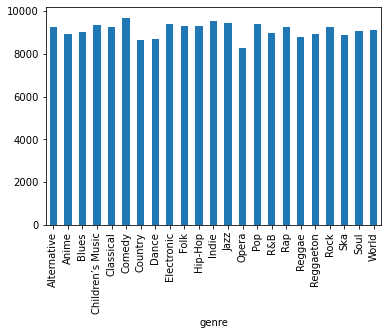

In [134]:
import matplotlib.pyplot as plt

# Group the data by the target column and get the size of each group
sizes = df_renewed.groupby('genre').size()

# Plot the sizes as a bar plot
sizes.plot.bar(stacked=True)

# Show the plot
plt.show()
